**Analisis Klaster Sistem Penjaminan Mutu Internal Perguruan Tinggi di Wilayah LLDIKTI 4**



In [3]:
# Tentukan jalur file CSV
jalur_file = "datasets/data.csv"  # Ganti dengan jalur file yang sesuai di komputer Anda

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN



ModuleNotFoundError: No module named 'pandas'

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data/SPMI.csv')
df

NameError: name 'pd' is not defined

In [6]:
df.info()

NameError: name 'df' is not defined

In [7]:
df.columns

NameError: name 'df' is not defined

In [8]:
#detail data numerik
df.describe()

NameError: name 'df' is not defined

In [9]:
#type data
df.dtypes

NameError: name 'df' is not defined

In [10]:
#Miss Valuse
df.isnull().sum()

NameError: name 'df' is not defined

In [11]:
#Duplicated value
data_dup = df.duplicated().any()
data_dup

NameError: name 'df' is not defined

In [12]:
df.shape

NameError: name 'df' is not defined

In [ ]:
# Drop initial rows and columns that do not contain relevant data
cleaned_data = df.dropna(subset=['KODE', 'PT'])
cleaned_data.reset_index(drop=True, inplace=True)

In [ ]:
# Drop columns that are completely empty
cleaned_data = cleaned_data.dropna(axis=1, how='all')

In [ ]:
# Rename columns based on the header information present in the dataset
cleaned_data.columns = ['ID', 'Kode', 'Nama PT', 'Kota', 'Faswil', 'Kebijakan', 'Kolom 6', 'Kolom 7', 'Standar Institusi',
                        'Kolom 9', 'Kolom 10', 'Kolom 11', 'Kolom 12', 'Kolom 13', 'Kolom 14', 'Kolom 15', 'Kolom 16',
                        'Kolom 17', 'Kolom 18', 'Kolom 19', 'Kolom 20', 'Kolom 21', 'Kolom 22', 'Kolom 23', 'Kolom 24',
                        'Bobot VLD', 'Ket. Validasi', 'Bobot VER', 'Ket. Verifikasi', 'Bobot UNG', 'Ket. Unggah',
                        'Klaster', 'Count', 'Kolom 33']

In [ ]:
# Drop irrelevant columns
columns_to_drop = ['Kolom 6', 'Kolom 7', 'Kolom 9', 'Kolom 10', 'Kolom 11', 'Kolom 12', 'Kolom 13', 'Kolom 14', 'Kolom 15',
                   'Kolom 16', 'Kolom 17', 'Kolom 18', 'Kolom 19', 'Kolom 20', 'Kolom 21', 'Kolom 22', 'Kolom 23', 'Kolom 24',
                   'Kolom 33']
cleaned_data = cleaned_data.drop(columns=columns_to_drop)

In [ ]:
# Convert percentage strings to numerical values and handle NaN
features = ['Kebijakan', 'Standar Institusi', 'Bobot VLD', 'Bobot VER', 'Bobot UNG']
for feature in features[2:]:
    cleaned_data[feature] = cleaned_data[feature].str.replace('%', '').astype(float)

cleaned_data[features] = cleaned_data[features].fillna(cleaned_data[features].mean())

In [ ]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cleaned_data[features])

In [ ]:
# Convert scaled data back to DataFrame for ease of use
processed_data = pd.DataFrame(data_scaled, columns=features)

In [ ]:
# Display the processed data
print(processed_data.head())

   Kebijakan  Standar Institusi  Bobot VLD  Bobot VER  Bobot UNG
0   0.194487           0.706475   1.525603   1.397488   1.180316
1   0.194487           0.706475   1.216799   1.083269   0.810994
2   0.194487           0.706475   1.216799   1.397488   1.180316
3   0.194487           0.706475   1.525603   0.826182   0.508821
4   0.194487           0.706475   1.048360   0.911878   0.878143


In [ ]:
# Memeriksa jumlah nilai NaN setelah pengisian
nan_counts_after_filling = cleaned_data[features].isnull().sum()
print(nan_counts_after_filling)


Kebijakan            0
Standar Institusi    0
Bobot VLD            0
Bobot VER            0
Bobot UNG            0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


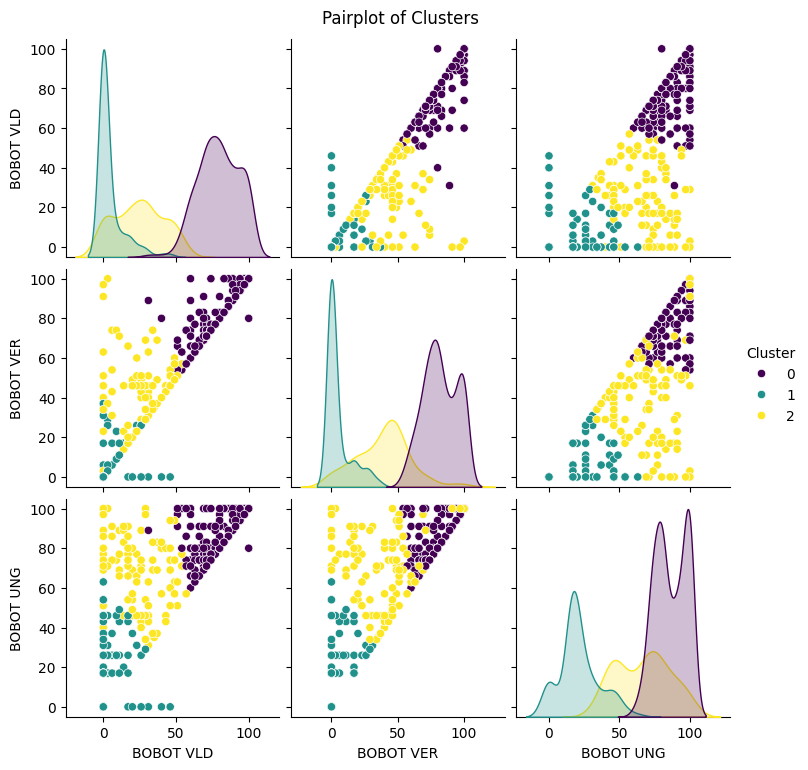

In [ ]:

# Drop rows and columns that are entirely NaN and convert necessary columns to numeric
cleaned_data = df.dropna(how='all').reset_index(drop=True)
numeric_columns = ['BOBOT VLD', 'BOBOT VER', 'BOBOT UNG']

# Convert columns to numeric, errors='coerce' will convert non-convertible values to NaN
for col in numeric_columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col].str.replace('%', '').str.strip(), errors='coerce')

# Drop rows with NaN values in the numeric columns we're interested in
cleaned_data = cleaned_data.dropna(subset=numeric_columns)

# Prepare data for clustering
X = cleaned_data[numeric_columns]

# Using KMeans for clustering with an assumed number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add clusters back to the dataframe
cleaned_data['Cluster'] = clusters

# Plotting
sns.pairplot(cleaned_data, hue='Cluster', vars=numeric_columns, palette='viridis')
plt.suptitle('Pairplot of Clusters', y=1.02)  # Adjust title position
plt.show()

In [ ]:
# Check the data types and any remaining non-numeric or unexpected values in the numeric columns
cleaned_data[numeric_columns].info(), cleaned_data[numeric_columns].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 440
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BOBOT VLD  440 non-null    float64
 1   BOBOT VER  440 non-null    float64
 2   BOBOT UNG  440 non-null    float64
dtypes: float64(3)
memory usage: 13.8 KB


(None,
         BOBOT VLD   BOBOT VER   BOBOT UNG
 count  440.000000  440.000000  440.000000
 mean    45.631818   51.040909   64.777273
 std     35.624924   35.015885   29.818287
 min      0.000000    0.000000    0.000000
 25%      6.000000   17.000000   43.000000
 50%     49.000000   57.000000   74.000000
 75%     80.000000   80.000000   89.000000
 max    100.000000  100.000000  100.000000)

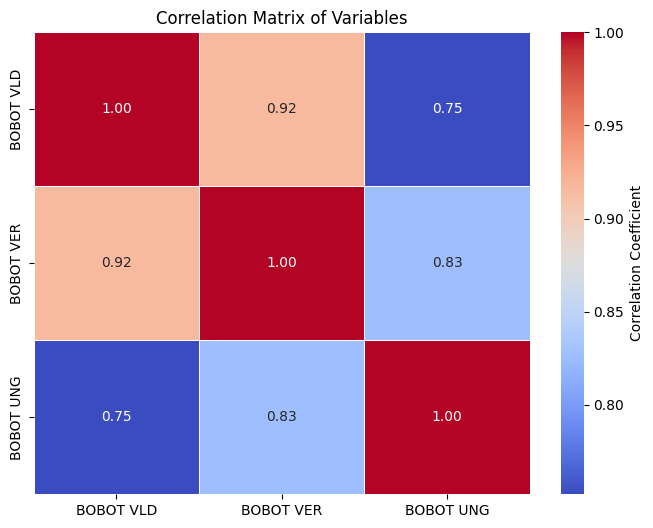

In [ ]:
# Calculate the correlation matrix
correlation_matrix = cleaned_data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Variables')
plt.show()

**TRAIN AND SPLIT**

In [ ]:
# Assuming 'BOBOT VLD', 'BOBOT VER', and 'BOBOT UNG' are the features
features = cleaned_data[['BOBOT VLD', 'BOBOT VER', 'BOBOT UNG']]

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# Print the shapes of the train and test datasets to verify the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (352, 3)
Testing set shape: (88, 3)


**MODELLING**

In [ ]:
# Determine the number of clusters (e.g., 3)
num_clusters = 3

# Fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original cleaned data
cleaned_data['KMeans_Cluster'] = kmeans_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Fit the Mean Shift model
mean_shift = MeanShift()
mean_shift_clusters = mean_shift.fit_predict(data_scaled)

# Add cluster labels to the original cleaned data
cleaned_data['MeanShift_Cluster'] = mean_shift_clusters